### Cliff Walking Playground
Playground used to experiment with different algorithms on the Cliff Walking environment from Example 6.6 of Sutton and Barto

In [1]:
import sys
sys.path.append('/Users/bogdanfloris/Downloads/Code/Reinforcement-Learning/')
from library.dynamic_programming import dynamic_programming as dp
from library.td_learning import temporal_diff_learning as td
from library.environments.cliff_walking import CliffWalkingEnv
from library.plotting import plot_episode_stats

Define the environment

In [2]:
env = CliffWalkingEnv()

#### Dynamic Programming
Experiments on Cliff Walking environment using Dynamic Programming algorithms

In [3]:
policy, _ = dp.policy_iteration(env=env)

In [4]:
print("Optimal policy found using Policy Iteration algorithm")
env.render_policy(policy=policy)

Optimal policy found using Policy Iteration algorithm
 →  →  →  →  →  →  →  →  →  →  →  ↓ 
 →  →  →  →  →  →  →  →  →  →  →  ↓ 
 →  →  →  →  →  →  →  →  →  →  →  ↓ 
 ↑  C  C  C  C  C  C  C  C  C  C  G 

Policy Iteration converges to the optimal policy

#### Temporal Difference Learning
Experiments on Cliff Walking environment using Temporal Difference Learning algorithms

In [5]:
# SARSA hyperparameters
num_episodes = 1000
epsilon = 0.1

In [6]:
q, _ = td.sarsa(env, num_episodes, epsilon=epsilon)
policy = td.make_epsilon_greedy_policy(q=q, epsilon=0.0, action_count=env.action_space.n)
print("Policy after {} episodes of {} for \u03B5 = {}".format(num_episodes, 'SARSA', epsilon))
env.render_policy(policy=policy)

100%|██████████| 1000/1000 [00:02<00:00, 495.49it/s]

Policy after 1000 episodes of SARSA for ε = 0.1
 →  →  →  →  →  →  →  →  →  →  →  ↓ 
 ↑  ↑  →  →  ↑  ↑  ↑  ↑  →  →  ↓  ↓ 
 ↑  ↑  ↑  ←  →  ↑  ↑  →  ↑  ↑  →  ↓ 
 ↑  C  C  C  C  C  C  C  C  C  C  G 

In [7]:
# Q Learning hyperparameters
num_episodes = 1000
epsilon = 0.1

In [8]:
q, stats = td.q_learning(env, num_episodes, epsilon=epsilon)
policy = td.make_epsilon_greedy_policy(q=q, epsilon=0.0, action_count=env.action_space.n)
print("Policy after {} episodes of {} for \u03B5 = {}".format(num_episodes, 'Q-Learning', epsilon))
env.render_policy(policy=policy)

100%|██████████| 1000/1000 [00:01<00:00, 585.04it/s]

Policy after 1000 episodes of Q-Learning for ε = 0.1
 →  →  →  ↓  ↓  ↓  ↑  →  →  →  ↓  ↓ 
 ↓  →  →  →  ↓  ↓  ↓  →  →  →  ↓  ↓ 
 →  →  →  →  →  →  →  →  →  →  →  ↓ 
 ↑  C  C  C  C  C  C  C  C  C  C  G 

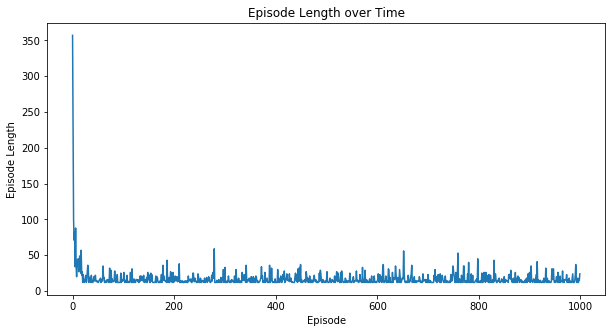

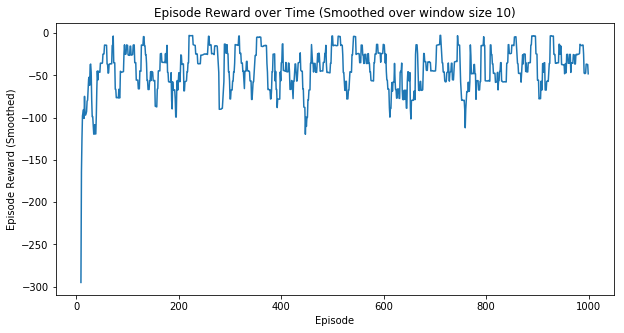

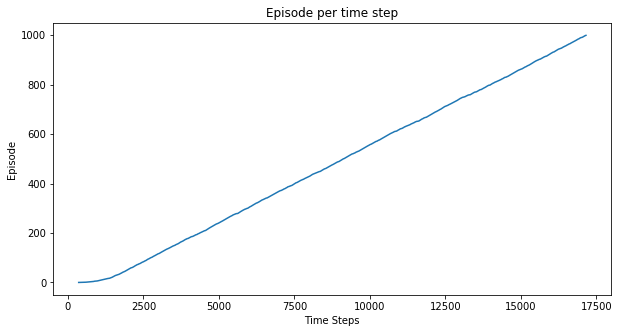

(<Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>,
 <Figure size 720x360 with 1 Axes>)

In [9]:
plot_episode_stats(stats)

As we can see, SARSA chooses to take the top route, while Q-Learning chooses the route that is near the cliff (taking the risk of falling in it, if we make an epsilon greedy policy). These results are according to the Sutton and Barto example.